=== L2 Regularization (C=0.01)- Likely Underfitting ===
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        72
           1       0.81      0.87      0.84        78

    accuracy                           0.83       150
   macro avg       0.83      0.82      0.83       150
weighted avg       0.83      0.83      0.83       150



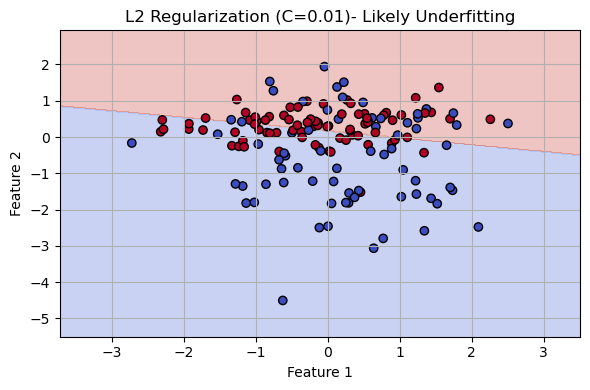

=== L2 Regularization (C=1)- Balanced ===
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        72
           1       0.82      0.86      0.84        78

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



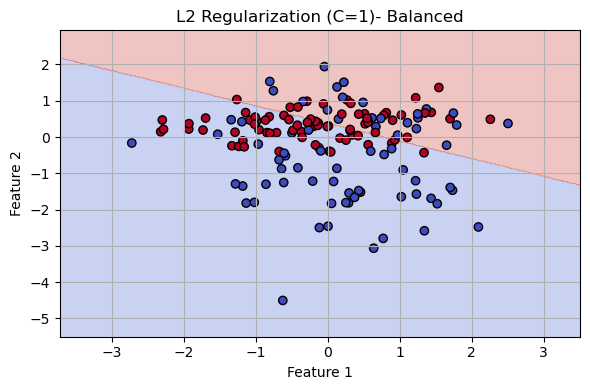

=== L2 Regularization (C=100)- Possible Overfitting ===
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        72
           1       0.82      0.86      0.84        78

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



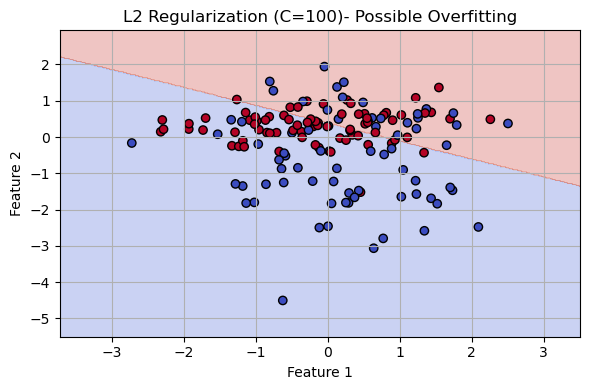

=== L1 Regularization (C=1)- Sparse Model ===
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        72
           1       0.80      0.85      0.82        78

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



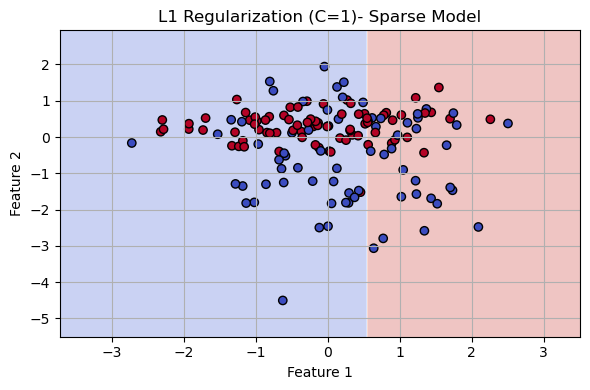

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Generate high-dimensional synthetic dataset
# Only 2 features are informative; others are noise/redundant
X, y = make_classification(n_samples=500,
                          n_features=10,      # 10 total features
                          n_informative=2,    # 2 informative for classification
                          n_redundant=6,      # 6 redundant (linear combinations)
                          n_clusters_per_class=1,
                          class_sep=0.8,
                          flip_y=0.1,         # 10% label noise
                          random_state=42)

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define a function to evaluate and plot decision boundaries
def evaluate_model(penalty, C, title):
    model = LogisticRegression(penalty=penalty, C=C, 
                              solver='liblinear', max_iter=200)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Evaluation Metrics
    print(f"=== {title} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Step 5: Visualize decision boundary using only first two features
    x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
    y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Fill grid with zeros for the remaining features
    n_features = X_train_scaled.shape[1]
    full_grid = np.zeros((grid.shape[0], n_features))
    full_grid[:, :2] = grid  # use only first 2 features for plot
    
    Z = model.predict(full_grid).reshape(xx.shape)
    
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], 
                c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.tight_layout()
    filename = title.lower().replace(" ", "_").replace("(", "").replace(")", "") + ".png"
    # plt.savefig(filename)
    plt.show()

# Step 6: Evaluate different regularization settings
# L2 Regularization (Ridge)
evaluate_model(penalty='l2', C=0.01, title='L2 Regularization (C=0.01)- Likely Underfitting')
evaluate_model(penalty='l2', C=1, title='L2 Regularization (C=1)- Balanced')
evaluate_model(penalty='l2', C=100, title='L2 Regularization (C=100)- Possible Overfitting')

# L1 Regularization (Lasso)
evaluate_model(penalty='l1', C=1, title='L1 Regularization (C=1)- Sparse Model')